<table width = 400 align="left" style="font-size:20px">
<tr>
    <td style="text-align:left"><b>Name</b></td>
    <td style="text-align:left">Aishwarya Chandramouli</td>
</tr>
<tr>
    <td> </td>
    <td style="text-align:left">ac78n@mst.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Course:</b></td>
    <td style="text-align:left">CS 5402</td>
</tr>
<tr>
    <td style="text-align:left"><b>Semester Project</b></td>
    <td style="text-align:left">Author Identification of Frankenstein Book</td>
</tr>
<tr>
    <td style="text-align:left"><b>Date:</b></td>
    <td style="text-align:left">2021-07-27</td>
</tr>
</table>

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import itertools
import string

# Imported to allow for the display of word clouds
import matplotlib.pyplot as plt

# Imported to create train/test partitioning of the data.
from sklearn.model_selection import train_test_split

# Imported to get frequency counts
import collections

# Imported to use confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

from nltk import tokenize

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

## Concept Description:

To create three datamining models to determine the authorship of Frankenstein.  

## Data Collection:

I have collected data from "gutenberg.org" source.

In [2]:
#Convert text file to a list of sentences
def split(filepath, min_char):

    # Load data into string variable and remove new line characters
    f = open(filepath, "r", encoding="utf8")
    text = f.read().replace('\n', ' ')
    text = text.replace('.”', '”.').replace('."', '".').replace('?”', '”?').replace('!”', '”!')
    text = text.replace('--', ' ').replace('. . .', '').replace('_', '')
    f.close()
    
    # Split text, tokenize into a list of sentences
    sentences = tokenize.sent_tokenize(text)
    #remove sentences that are less than min_char long
    sentences = [sent for sent in sentences if len(sent) >= min_char]

    return list(sentences)

Created lists for authors:

In [3]:
min_char = 7

pollidori = split('JohnPollidori.txt', min_char = min_char)\
           + split('JohnPollidori2.txt', min_char = min_char)
byron = split('Byron_vol1.txt', min_char = min_char)\
           + split('Byron_vol2.txt', min_char = min_char)
percy = split('Percy_shelley.txt', min_char = min_char)
mary = split('maryshelley_lastman.txt', min_char = min_char)\
           + split('frankenstein_maryshelly.txt', min_char = min_char)

Printing the length of each lists:

In [4]:
text_dict = {'Byron': byron, 'Pollidori': pollidori, 'Percy': percy, 'Mary': mary}

for key in text_dict.keys():
    print(key, ':', len(text_dict[key]))

Byron : 15156
Pollidori : 3350
Percy : 16427
Mary : 10463


In [5]:
# Set random seed
np.random.seed(3)
max_len = 1000

names = [byron, pollidori, percy, mary]
list1 = []

for name in names:
    name = np.random.choice(name, max_len, replace = False)
    list1 += list(name)

print('The len is:', len(list1))

The len is: 4000


In [6]:
authors =  ['Pollidori']*max_len + ['Byron']*max_len + ['Percy']*max_len + ['Mary']*max_len
print('Authors are:', len(authors))

Authors are: 4000


In [7]:
author_names = ['pollidori','byron','percy','mary']

In [8]:
random.seed(3)

# Randomly shuffle data
zipped = list(zip(list1, authors))
random.shuffle(zipped)
list1, authors = zip(*zipped)

#### OUTPUT DATA:

In [9]:
output_auth = pd.DataFrame()
#output_auth['id'] 
output_auth['text'] = list1
output_auth['author'] = authors

print(output_auth.head())

                                                text author
0  It was indeed a paradise compared to the bleak...   Mary
1  The play written by Polidori, which received s...  Byron
2                                            "Help!"   Mary
3       CANCELLED FRAGMENTS OF "PROMETHEUS UNBOUND".  Percy
4  The lines from Christabel are these—          ...  Byron


#### Exporting the data to CSV file:

In [10]:
output_auth.to_csv('authors_train_data_final.csv', index=False)

## Example Description:

<b>Text</b>

This is a nominal attribute that contains texts written by author.

<b>Author</b>

This is a nominal attribute that contains names of the author.

## Data Import and Wrangling: 

The results of each search is read from the respective excel into separate dataframes.  Careful attention is paid to make sure the data is read in as character strings.

In [11]:
df_author = pd.read_csv('authors_train_data_final.csv')
df_author.head()

,text,author
0,It was indeed a paradise compared to the bleak...,Mary
1,"The play written by Polidori, which received s...",Byron
2,"""Help!""",Mary
3,"CANCELLED FRAGMENTS OF ""PROMETHEUS UNBOUND"".",Percy
4,The lines from Christabel are these— ...,Byron


In [12]:
df_author.columns

Index(['text', 'author'], dtype='object')

In [13]:
lemmatiser = WordNetLemmatizer()

#Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [14]:
y = df_author['author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

### 

## Exploratory Data Analysis:
Looking into what type of measure the attributes are.

In [15]:
df_author.describe()

,text,author
count,4000,4000
unique,3945,4
top,[MS. M.,Pollidori
freq,7,1000


It was indeed a paradise compared to the bleak forest, my former residence, the rain-dropping branches, and dank earth.
Mary


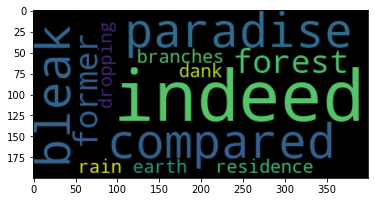

The play written by Polidori, which received so little commendation, was, I suppose, the Cajetan which is mentioned at an early point in the Journal.
Byron


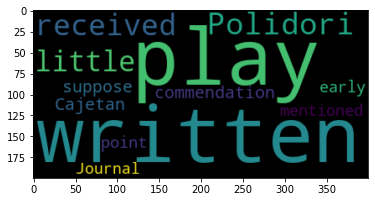

CANCELLED FRAGMENTS OF "PROMETHEUS UNBOUND".
Percy


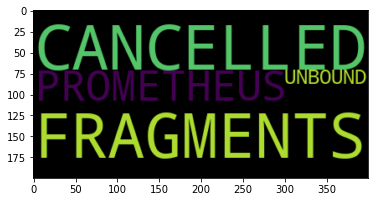

Sweet Florence[133] could another ever share       This wayward, loveless heart, it would be thine:       But checked by every tie, I may not dare       To cast a worthless offering at thy shrine,     Nor ask so dear a breast to feel one pang for mine.
Pollidori


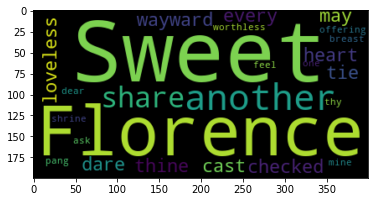

In [16]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = df_author['text']

wordcloud1 = WordCloud().generate(X[0]) 
wordcloud2 = WordCloud().generate(X[1]) 
wordcloud3 = WordCloud().generate(X[3]) 
wordcloud4 = WordCloud().generate(X[6]) 


print(X[0])
print(df_author['author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()

print(X[1])
print(df_author['author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()

print(X[3])
print(df_author['author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

print(X[6])
print(df_author['author'][6])
plt.imshow(wordcloud4, interpolation='bilinear')
plt.show()

### Word Tokenization

Here, I have taken a text from Percy's book and tried to tokenize.

In [17]:
from nltk.tokenize import sent_tokenize
text='79 rightly Wise manuscript; nightly Hunt manuscript, editions 1832, 1839.'
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['79 rightly Wise manuscript; nightly Hunt manuscript, editions 1832, 1839.']


### Frequency Distribution

In [18]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['79', 'rightly', 'Wise', 'manuscript', ';', 'nightly', 'Hunt', 'manuscript', ',', 'editions', '1832', ',', '1839', '.']


In [19]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 12 samples and 14 outcomes>


In [20]:
fdist.most_common(2)

[('manuscript', 2), (',', 2)]

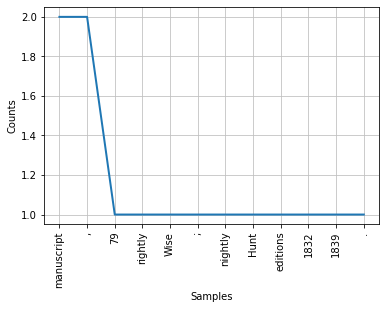

In [21]:
fdist.plot(30,cumulative=False)
plt.show()

#### Note:
- word_count: number of words in the average sentence
- sentence_length: number of word characters in each sentence
- text_length: pure number of characters, including spaces and punctuation
- punctuation_per_char: how often an author uses punctuation marks per character written
- unique_ration: ratio of unique words to total words
- avg_word_length: how many characters is in the average word written

In [22]:
import string
import nltk
no_punct_translator=str.maketrans('','',string.punctuation)

df_author['words'] = df_author['text'].apply(lambda t: nltk.word_tokenize(t.translate(no_punct_translator).lower()))

In [23]:
df_author['word_count'] = df_author['words'].apply(lambda words: len(words))

# for normalization, how many characters per sentence w/o punctuation
df_author['sentence_length'] = df_author['words'].apply(lambda w: sum(map(len, w)))

# for future calculations, let's keep around the full text length, including punctuation
df_author['text_length'] = df_author['text'].apply(lambda t: len(t))

df_author['punctuation_count'] = df_author['text'].apply(lambda t: len(list(filter(lambda c: c in t, string.punctuation))))

df_author['punctuation_per_char'] = df_author['punctuation_count'] / df_author['text_length']

In [24]:
def unique_words(words):
    word_count = len(words)
    unique_count = len(set(words)) # creating a set from the list 'words' removes duplicates
    return unique_count / word_count

df_author['unique_ratio'] = df_author['words'].apply(unique_words)
df_author.groupby(['author'])['unique_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Byron,1000.0,0.921710,0.086055,0.533333,0.863636,0.937500,1.0,1.0
Mary,1000.0,0.895787,0.086852,0.594059,0.833333,0.903226,1.0,1.0
Percy,1000.0,0.923932,0.091351,0.391304,0.857143,0.958333,1.0,1.0
Pollidori,1000.0,0.929163,0.088301,0.470588,0.870617,0.973666,1.0,1.0


In [25]:
avg_length = lambda words: sum(map(len, words)) / len(words)

df_author['avg_word_length'] = df_author['words'].apply(avg_length)
df_author.groupby(['author'])['avg_word_length'].describe()

,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Byron,1000.0,4.610289,0.806573,2.625000,4.142857,4.500000,4.968862,12.0
Mary,1000.0,4.489351,0.694394,2.000000,4.130084,4.476190,4.818554,12.0
Percy,1000.0,4.463196,1.049968,1.333333,4.000000,4.386882,4.843117,12.0
Pollidori,1000.0,4.448612,1.024939,1.000000,4.000000,4.464103,4.857143,9.0


In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Let's test how this works
print(sid.polarity_scores('Vader text analysis is my favorite thing ever'))
print(sid.polarity_scores('I hate vader and everything it stands for'))

{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}
{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.5719}


In [27]:
df_author['sentiment'] = df_author['text'].apply(lambda t: sid.polarity_scores(t)['compound'])
df_author.groupby('author')['sentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Byron,1000.0,0.071554,0.380915,-0.9569,0.0000,0.0,0.3388,0.9631
Mary,1000.0,0.051154,0.519767,-0.9773,-0.3612,0.0,0.4588,0.9848
Percy,1000.0,0.037021,0.456475,-0.9772,-0.1779,0.0,0.3612,0.9716
Pollidori,1000.0,0.058550,0.404957,-0.9810,0.0000,0.0,0.2732,0.9867


<AxesSubplot:xlabel='author', ylabel='avg_word_length'>

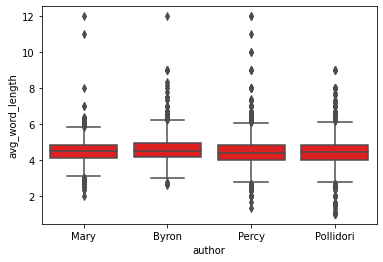

In [28]:
#boxplot for word length
sns.boxplot(x = "author", y = "avg_word_length", data=df_author, color = "red")

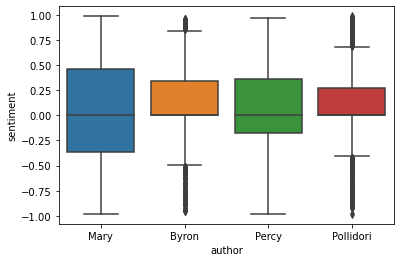

In [29]:
sns.boxplot(x="author", y="sentiment", data=df_author);

<AxesSubplot:xlabel='author', ylabel='word_count'>

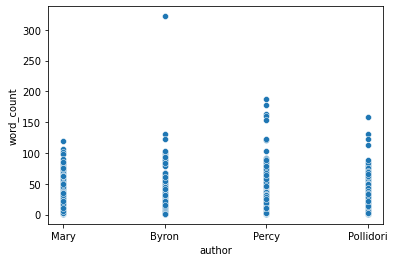

In [30]:
#Scatterplot for Wordcount
sns.scatterplot(data=df_author, x="author", y="word_count")

### 

## Mining and Analytics:

The following has data mining models to determine the authorship of Frankenstein

#### Partioning the dataset as 80% for Training and 20% for Validation

In [32]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1234)

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)

text_bow_train=bow_transformer.transform(X_train)

text_bow_test=bow_transformer.transform(X_test)

## DataMining Model 1: Multinomial Naive Bayes - Classifier

In [33]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model = model.fit(text_bow_train, y_train)

In [34]:
model.score(text_bow_train, y_train)

0.92375

In [35]:
model.score(text_bow_test, y_test)

0.68375

In [36]:
from sklearn.metrics import classification_report
 
# getting the predictions of the Validation Set...
predictions = model.predict(text_bow_test)
# getting the Precision, Recall, F1-Score
print(classification_report(y_test,predictions,target_names=author_names))

              precision    recall  f1-score   support

   pollidori       0.71      0.74      0.73       188
       byron       0.66      0.79      0.72       225
       percy       0.70      0.67      0.69       200
        mary       0.67      0.51      0.58       187

    accuracy                           0.68       800
   macro avg       0.69      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800



### Confusion Matrix

Normalized confusion matrix
[[0.7393617  0.14361702 0.03191489 0.08510638]
 [0.08444444 0.79111111 0.09333333 0.03111111]
 [0.065      0.14       0.67       0.125     ]
 [0.12834225 0.19786096 0.16042781 0.51336898]]


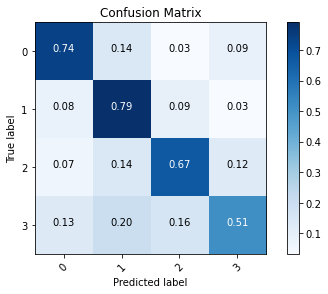

In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test,predictions)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2,3], normalize=True,
                      title='Confusion Matrix')

### From confusion matrix, we can note that author Lord Byron has a predicted score of 79%.

### 

## DataMining Model 2: TensorFlow

In [38]:
feature_columns = ['author', 'word_count', 'text_length', 'punctuation_per_char', 'unique_ratio', 'avg_word_length', 'sentiment']
df_features = df_author[feature_columns]

Using Nltk for stop words:

In [39]:
df_words = pd.concat([pd.DataFrame(data={'author': [row['author'] for _ in row['words']], 'word': row['words']})
           for _, row in df_author.iterrows()], ignore_index=True)

df_words = df_words[~df_words['word'].isin(nltk.corpus.stopwords.words('english'))]

df_words.shape

(46383, 2)

In [40]:
df_train=df_features.sample(frac=0.8,random_state=1)
df_dev=df_features.drop(df_train.index)

In [41]:
df_train.head()

,author,word_count,text_length,punctuation_per_char,unique_ratio,avg_word_length,sentiment
200,Pollidori,25,150,0.026667,0.880000,4.360000,0.0000
1078,Percy,18,100,0.030000,0.888889,4.444444,-0.3400
610,Mary,46,276,0.014493,0.913043,4.847826,-0.2023
2159,Pollidori,7,33,0.060606,1.000000,3.571429,-0.2500
1169,Pollidori,6,32,0.125000,1.000000,2.833333,0.0000


In [42]:
import tensorflow as tf

feature_word_count = tf.feature_column.numeric_column("word_count")
feature_text_length = tf.feature_column.numeric_column("text_length")
feature_punctuation_per_char = tf.feature_column.numeric_column("punctuation_per_char")
feature_unique_ratio = tf.feature_column.numeric_column("unique_ratio")
feature_avg_word_length = tf.feature_column.numeric_column("avg_word_length")
feature_sentiment = tf.feature_column.numeric_column("sentiment")

base_columns = [
    feature_word_count, feature_text_length, feature_punctuation_per_char, feature_unique_ratio, feature_avg_word_length, feature_sentiment
]

A training function for estimators and a simple linear classifier:

In [43]:
import tempfile

model_dir = tempfile.mkdtemp()

labels_train = df_train['author']

train_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=df_train,
    y=labels_train,
    batch_size=100,
    num_epochs=None,
    shuffle=True, 
    num_threads=5)

linear_model = tf.estimator.LinearClassifier(
    model_dir=model_dir, 
    feature_columns=base_columns,
    n_classes=len(author_names),
    label_vocabulary=author_names)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aishw\\AppData\\Local\\Temp\\tmphps7axw8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Training the model: While re-running the code for train model I encountered error however I got the accuracy rate when I initially ran. Apologies for inconvenience

Code:

train_steps = 5000

linear_model.train(input_fn=train_fn, steps=train_steps)

dev_test_fn = tf.estimator.inputs.pandas_input_fn(

    x=df_dev,
    
    y=df_dev['author'],
    
    batch_size=100,
    
    num_epochs=1, 
    
    shuffle=False, 
    
    num_threads=5)

linear_model.evaluate(input_fn=dev_test_fn)["accuracy"]

### From the tensorflow model, the accuracy is 36% however the authorship cannot be determined from it.

### 

## DataMining Model 3: Logistic Regression

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [45]:
model_logic=Pipeline([('vect',CountVectorizer()),
 ('tfidf',TfidfTransformer()),
 ('clf',LogisticRegression(n_jobs=1,C=1e5))])
model_logic.fit(X_train,y_train)
y_pred=model_logic.predict(X_test)
print("accuracy %s" % accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred,target_names=author_names))

accuracy 0.66
              precision    recall  f1-score   support

   pollidori       0.67      0.78      0.72       188
       byron       0.70      0.68      0.69       225
       percy       0.66      0.57      0.61       200
        mary       0.60      0.61      0.61       187

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.66      0.66      0.66       800



C:\Users\aishw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

In [46]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[139  27   6  16]
 [ 19 178  21   7]
 [ 13  28 134  25]
 [ 24  37  30  96]]


In [47]:
logisticRegr = LogisticRegression()


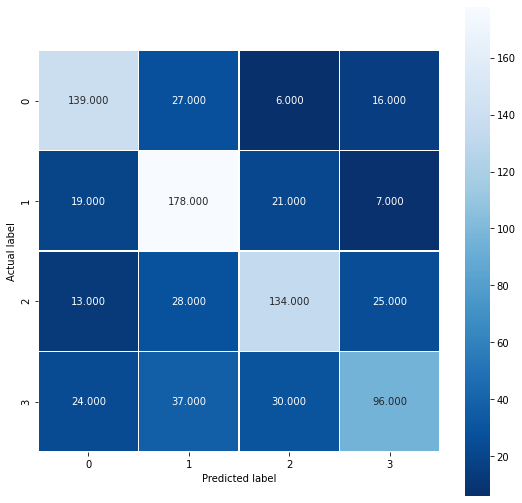

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### The Logistic regression model has an accuracy rate of 65%.

### Linear SVC classification on the data 

In [49]:
from sklearn.svm import LinearSVC
model_svm=Pipeline([('vect',CountVectorizer()),
 ('tfidf',TfidfTransformer()),
 ('clf',LinearSVC(C=1.0,loss='squared_hinge',penalty='l2',dual=False))])
model_svm.fit(X_train,y_train)
y_pred=model_svm.predict(X_test)
print("accuracy %s" % accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred,target_names=author_names))

accuracy 0.67
              precision    recall  f1-score   support

   pollidori       0.66      0.81      0.73       188
       byron       0.70      0.69      0.69       225
       percy       0.67      0.60      0.63       200
        mary       0.65      0.58      0.61       187

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800



### We can see that the logistic regression model has an accuracy score of 65% and Linear SVC has an accuracy score of 66%

## Evaluation:


In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

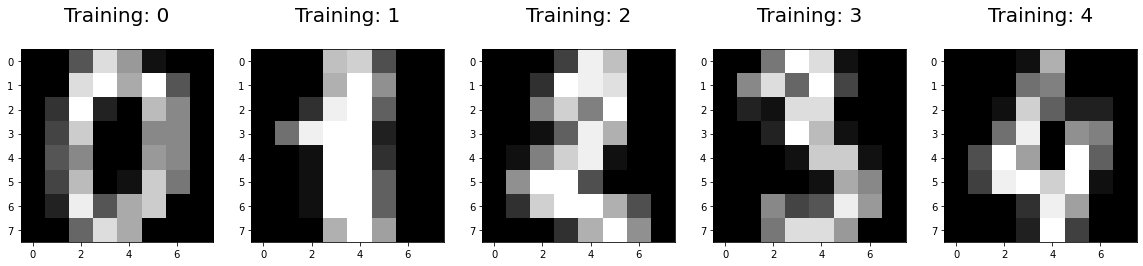

In [51]:
#Visualizing the labels in the dataset

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## Results:

The following are the results from the above analysis:

### Out of 3 models used, we could see that author, Lord Byron has the maximum F1 score ie; the weighted average of Precision and Recall. This score takes both false positives and false negatives into account and it is more useful than the accuracy rate. 

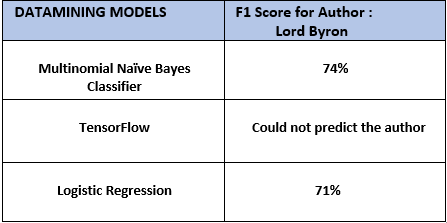

## References:

https://towardsdatascience.com/a-machine-learning-approach-to-author-identification-of-horror-novels-from-text-snippets-3f1ef5dba634

https://www.kaggle.com/sachynk/text-classification-using-svm

https://github.com/suewoon/author-identification/blob/master/modelling-explained.ipynb

https://www.kaggle.com/srkirkland/author-identification-with-tensorflow

http://www.nltk.org/api/nltk.sentiment.html#module-nltk.sentiment.vader

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a